# 순서
1. Crawling(데이터 모음)
2. Preprocessing (데이터 병합)
3. Feature Extraction (특성 추출)<br>
 3.1. Text [Fxt, W2v] (텍스트 특성)<br>
 3.2. Image [VGG, CNN] (이미지 특성)
4. Combine (특성 결합 후 분류)
5. Explain (Grad-Cam 사용)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Crawling

## 기본옵션

In [ ]:
!apt-get update
!pip install selenium
!pip install bs4
!apt install chromium-chromedriver
!pip install lxml
!pip install openpyxl

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (123 kB/s)
Reading package lists... Done
Reading package lists... Done
Building

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import time
import re

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max.colwidth',60)
pd.options.display.max_columns = 100

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 카테고리 별 데이터 크롤링
* 요리
* 경제
* 정치
* 게임
* 스포츠
* 영화
* 애완동물



### 스포츠 - 차도르(예시)

- 영상  정보 수집 ( 채널명/ 썸네일/ 구독자 수/ 제목 / 업로드 날짜 / 조회수 / 좋아요 / 싫어요 / 영상길이 / 카테고리)
- 전체 영상 목록이 보이는 페이지에서 각 동영상의 url 추출하는 과정

In [ ]:
url_dict = {
    '차도르' : 'https://www.youtube.com/channel/UCtj_00nn_viF6wJNeqgpEiA/videos',
    '로드FC':'https://www.youtube.com/user/roadfc/videos',
    '석꾸축꾸': 'https://www.youtube.com/channel/UC8valWz_8jFnX4tMGCeC62w/videos',
    'JK아트사커':'https://www.youtube.com/user/JKartsocceracademy/videos',
    '슛포러브':'https://www.youtube.com/user/shootforloveworld/videos',
    '꽁병지':'https://www.youtube.com/channel/UCKgYRjFGgvj7aS8y4EhH2CA/videos',
    '럽볼' : 'https://www.youtube.com/channel/UC4c-TDRIFIlnskNCcDkg0hA/videos',
    '하승진' : 'https://www.youtube.com/channel/UCINRJxfiq8pXfQm1EucWFfw/videos',
    '터치플레이' : 'https://www.youtube.com/channel/UCHoawYLjOR3GJGH8-kQ9xuQ/videos',
    'Ball in love': 'https://www.youtube.com/channel/UCGfYw3aUYipiJBe56KdTzMg/videos',
    '동네 야구' : 'https://www.youtube.com/user/omooriceful/videos',
    '야신야덕' : 'https://www.youtube.com/channel/UC270ueFEsQ21S26TYI_9yVA/videos',
    '키다리' : 'https://www.youtube.com/user/TeamAirwave/videos',
    '트리거' : 'https://www.youtube.com/channel/UCoyogo_Fg-Z5jDOQz6Rt6eA/videos',
    '스브스' : 'https://www.youtube.com/user/sbssportsnow/videos'
}

In [ ]:
list(url_dict.items())

[('차도르', 'https://www.youtube.com/channel/UCtj_00nn_viF6wJNeqgpEiA/videos'),
 ('로드FC', 'https://www.youtube.com/user/roadfc/videos'),
 ('석꾸축꾸', 'https://www.youtube.com/channel/UC8valWz_8jFnX4tMGCeC62w/videos'),
 ('JK아트사커', 'https://www.youtube.com/user/JKartsocceracademy/videos'),
 ('슛포러브', 'https://www.youtube.com/user/shootforloveworld/videos'),
 ('꽁병지', 'https://www.youtube.com/channel/UCKgYRjFGgvj7aS8y4EhH2CA/videos'),
 ('럽볼', 'https://www.youtube.com/channel/UC4c-TDRIFIlnskNCcDkg0hA/videos'),
 ('하승진', 'https://www.youtube.com/channel/UCINRJxfiq8pXfQm1EucWFfw/videos'),
 ('터치플레이', 'https://www.youtube.com/channel/UCHoawYLjOR3GJGH8-kQ9xuQ/videos'),
 ('Ball in love',
  'https://www.youtube.com/channel/UCGfYw3aUYipiJBe56KdTzMg/videos'),
 ('동네 야구', 'https://www.youtube.com/user/omooriceful/videos'),
 ('야신야덕', 'https://www.youtube.com/channel/UC270ueFEsQ21S26TYI_9yVA/videos'),
 ('키다리', 'https://www.youtube.com/user/TeamAirwave/videos'),
 ('트리거', 'https://www.youtube.com/channel/UCoyogo_

In [ ]:
# colab 가상환경에서 driver를 사용하기 위한 세팅
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=options)

# 채널 별 동영상 카테고리의 url을 모두 조사하여 삽입
url = list(url_dict.values())[0]
driver.get(url)

In [ ]:
# 동적 웹페이지 구성
# 스크롤 동작을 통해 모든 동영상 데이터를 로딩시킴
# 전체 페이지를 모두 조회하기 위해 last_page의 scroll height를 미리 계산함
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1.5)       # 인터벌 1이상으로 줘야 데이터 취득가능(롤링시 데이터 로딩 시간 때문)
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight")

    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height
  
# html_source 정보를 저장
html_source = driver.page_source
driver.close()

In [ ]:
# BeautifulSoup을 통해 parsing
soup = BeautifulSoup(html_source,'lxml')

# 각 동영상의 링크를 얻기 위해 개별 동영상을 담은 list 생성
video_list = soup.find_all('ytd-grid-video-renderer',{'class':'style-scope ytd-grid-renderer'})

# 축약된 url을 전체 url로 변환시키기
base_url = 'https://www.youtube.com'
url_list = []

# thumbnail 에 a 태그로 포함된 href 링크를 찾고 완전한 url로 변환시켜줌
for i in range(len(video_list)):
  full_url = base_url+video_list[i].find('a',{'id':'thumbnail'})['href']
  url_list.append(full_url)

In [ ]:
# 스포츠 채널의 DATAFRAME
sports = pd.DataFrame({'channel_name' :[],
                           'subscribers' : [],
                           'thumbnail' :[],
                           'video_name':[],
                           'video_length':[],
                           'upload_date':[],
                           'hits':[],
                           'likes_num':[],
                           'dislikes_num':[],
                           'category':[] })

# url_list 순회하며 정보 저장
for i in range(len(url_list)):

  
  try:
    # 전체 채널 정보 (채널이름, 구독자)
    # 동영상 url 이전에 얻기 편한 정보 (동영상 제목, 동영상 길이)
    channel_name = soup.find('title').text
    subscribers = soup.find('yt-formatted-string',{'id':'subscriber-count'}).text    
    video_name = video_list[i].find('a',{'id':'video-title'}).text
    video_length = video_list[i].find('span', {'class':'style-scope ytd-thumbnail-overlay-time-status-renderer'}).text.split('\n')[1]
    
    # error 유발 ㅠ, aria-hidden 속성 때문인 것으로 보임
    # thumbnail = video_list[i].find('img', {'src' : True})['src'] 

    # url에 해당하는 동영상 페이지 들어가기
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver',options=options)
    
    # url 삽입
    driver.get(url_list[i])
    
    # 스크롤
    last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    scrolls = 2
    while scrolls:
      driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
      time.sleep(1.5)       # 인터벌 1이상으로 줘야 데이터 취득가능(롤링시 데이터 로딩 시간 때문)
      scrolls -= 1

    # video_source를 parsing
    video_source = driver.page_source
    video_soup = BeautifulSoup(video_source,'lxml')
    driver.close()

    # 정보 가져오기
    # 올린 날짜, 조회수, 좋아요 수, 싫어요 수, 카테고리 정보
    
    scripts = video_soup.find('script',{'id':'scriptTag'}).text.split('"')
    for script in scripts:
      if 'img' in script:
        thumbnail = script
        break
    upload_date = video_soup.find('div',{'id':'date'}).find('yt-formatted-string').text
    hits = video_soup.find('span',{'class':'view-count'}).text.split()[0]
    likes_num = video_soup.find_all('yt-formatted-string',{'id':'text','class':'style-scope ytd-toggle-button-renderer style-text'})[0]['aria-label'].split()[0]
    dislikes_num = video_soup.find_all('yt-formatted-string',{'id':'text','class':'style-scope ytd-toggle-button-renderer style-text'})[1]['aria-label'].split()[0]
    category = 'sports' # 바꾸면됨

    # 임시 데이터 프레임을 생성하여 기존 데이터 프레임에 삽입
    tmp = pd.DataFrame({'channel_name' :[channel_name],
                                    'subscribers' : [subscribers],
                                    'thumbnail' :[thumbnail],
                                    'video_name':[video_name],
                                    'video_length':[video_length],
                                    'upload_date':[upload_date],
                                    'hits' :[hits],
                                    'likes_num':[likes_num],
                                    'dislikes_num':[dislikes_num],
                                    'category':[category]})
    
    # append 이용하여 아래로 concat
    sports = sports.append(tmp)

  # 동영상의 형식이 기본 구조와 다른 경우 error 발생
  # 이 때문에 정보 조회가 되지 않는 경우 예외 처리하여 데이터에서 삭제
  except KeyError as k: 
      print(k, i)
  except AttributeError as a: 
      print(a ,i)
  except IndexError as e:
      print(e,i)
  except TypeError as t:
      print(t, i)

KeyboardInterrupt: ignored

In [ ]:
len(sports)
sports.head()

236

,channel_name,subscribers,thumbnail,video_name,video_length,upload_date,hits,likes_num,dislikes_num,category
0,차도르 - YouTube,388K subscribers,https://i.ytimg.com/vi/hZWYl6etClk/maxresdefault.jpg,(2020년 최신) 중국 무술 고수들의 무모한 격투기 도전 ㄷㄷ,10:50,"Oct 3, 2020","113,983",970,48,sports
0,차도르 - YouTube,388K subscribers,https://i.ytimg.com/vi/7H2gliJ3j1c/maxresdefault.jpg,【 차도르 UFC 게임 】 레슬링 천재 하빕의 개미지옥 !! (2020-10-3 토요일),2:35:11,Streamed live 23 hours ago,"9,610",113,11,sports
0,차도르 - YouTube,388K subscribers,https://i.ytimg.com/vi/JJsjOg_H298/maxresdefault.jpg,펀치 속도 실화냐 ?? 믿기지 않는 128kg 복서의 스피드 ㄷㄷ 승률이 95% !!!?,11:20,"Oct 1, 2020","82,434",566,33,sports
0,차도르 - YouTube,388K subscribers,https://i.ytimg.com/vi/pMhCYVzH1Wc/maxresdefault.jpg,대한민국에 복싱 천재가 나타났다 !! 12년동안 무패일수 밖에 없을 정도로 압도적이다 ㄷㄷ #최현미,16:33,"Sep 30, 2020","187,114","1,562",49,sports
0,차도르 - YouTube,388K subscribers,https://i.ytimg.com/vi/k4OTLdHzt_I/maxresdefault.jpg,【 추석특집 차도르 생방송 】 전직 변호사가 변호사 게임에 도전했다 !!? (2020-09-30 수요일),3:10:45,"Streamed live on Sep 30, 2020","7,625",83,8,sports


In [ ]:
sports.to_csv('{}.csv'.format(list(url_dict.keys())[0]),encoding='utf-8-sig')

### 로컬

```
# 로컬에서 한다면

# 드라이버 직접 설치
# 드라이버 실행 파일 경로 삽입
path = '@needs_for_you/chromedriver.exe'
driver = webdriver.Chrome(path)
driver.maximize_window()

# 채널-동영상 url
url = 'https://www.youtube.com/user/sbssportsnow/videos'
driver.get(url)

# 동적 웹페이지 구성
# 스크롤 동작을 통해 모든 동영상 데이터를 로딩시킴
# 전체 페이지를 모두 조회하기 위해 last_page의 scroll height를 미리 계산함
last_page_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1.5)       # 인터벌 1이상으로 줘야 데이터 취득가능(롤링시 데이터 로딩 시간 때문)
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight")

    if new_page_height == last_page_height:
        break
    last_page_height = new_page_height
  
# html_source 정보를 저장
html_source = driver.page_source
driver.close()

# BeautifulSoup을 통해 parsing
soup = BeautifulSoup(html_source,'lxml')

# 각 동영상의 링크를 얻기 위해 개별 동영상을 담은 list 생성
video_list = soup.find_all('ytd-grid-video-renderer',{'class':'style-scope ytd-grid-renderer'})

# 축약된 url을 전체 url로 변환시키기
base_url = 'https://www.youtube.com'
url_list = []

# thumbnail 에 a 태그로 포함된 href 링크를 찾고 완전한 url로 변환시켜줌
for i in range(len(video_list)):
  full_url = base_url+video_list[i].find('a',{'id':'thumbnail'})['href']
  url_list.append(full_url)

# 스포츠 채널의 DATAFRAME
sports = pd.DataFrame({'channel_name' :[],
                           'subscribers' : [],
                           'thumbnail' :[],
                           'video_name':[],
                           'video_length':[],
                           'upload_date':[],
                           'hits':[],
                           'likes_num':[],
                           'dislikes_num':[],
                           'category':[] })

# url_list 순회하며 정보 저장
for i in range(len(url_list)):

  try:
    # 전체 채널 정보 (채널이름, 구독자)
    # 동영상 url 이전에 얻기 편한 정보 (동영상 제목, 동영상 길이)
    channel_name = soup.find('title').text
    subscribers = soup.find('yt-formatted-string',{'id':'subscriber-count'}).text    
    video_name = video_list[i].find('a',{'id':'video-title'}).text
    video_length = video_list[i].find('span', {'class':'style-scope ytd-thumbnail-overlay-time-status-renderer'}).text.split('\n')[1]
    
    # error 유발 ㅠ, aria-hidden 속성 때문인 것으로 보임
    # thumbnail = video_list[i].find('img', {'src' : True})['src'] 

    # url에 해당하는 동영상 페이지 들어가기
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome('chromedriver',options=options)
    
    # url 삽입
    driver.get(url_list[i])
    
    # 스크롤
    last_page_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    scrolls = 2
    while scrolls:
      driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
      time.sleep(1.5)       # 인터벌 1이상으로 줘야 데이터 취득가능(롤링시 데이터 로딩 시간 때문)
      scrolls -= 1

    # video_source를 parsing
    video_source = driver.page_source
    video_soup = BeautifulSoup(video_source,'lxml')
    driver.close()

    # 정보 가져오기
    # 올린 날짜, 조회수, 좋아요 수, 싫어요 수, 카테고리 정보
    
    scripts = video_soup.find('script',{'id':'scriptTag'}).text.split('"')
    for script in scripts:
      if 'img' in script:
        thumbnail = script
        break
    upload_date = video_soup.find('div',{'id':'date'}).find('yt-formatted-string').text
    hits = video_soup.find('span',{'class':'view-count'}).text.split()[0]
    likes_num = video_soup.find_all('yt-formatted-string',{'id':'text','class':'style-scope ytd-toggle-button-renderer style-text'})[0]['aria-label'].split()[0]
    dislikes_num = video_soup.find_all('yt-formatted-string',{'id':'text','class':'style-scope ytd-toggle-button-renderer style-text'})[1]['aria-label'].split()[0]
    category = 'sports' # 바꾸면됨

    # 임시 데이터 프레임을 생성하여 기존 데이터 프레임에 삽입
    tmp = pd.DataFrame({'channel_name' :[channel_name],
                                    'subscribers' : [subscribers],
                                    'thumbnail' :[thumbnail],
                                    'video_name':[video_name],
                                    'video_length':[video_length],
                                    'upload_date':[upload_date],
                                    'hits' :[hits],
                                    'likes_num':[likes_num],
                                    'dislikes_num':[dislikes_num],
                                    'category':[category]})
    
    # append 이용하여 아래로 concat
    sports = sports.append(tmp)

  # 동영상마다 형식 통일이 되지 않아 정보 조회가 되지 않는 경우 예외 처리
  except KeyError as k: 
      print(k, i)
  except AttributeError as a: 
      print(a ,i)
  except IndexError as e:
      print(e,i)
  except TypeError as t:
      print(t, i)

sports.to_csv('subusu.csv',encoding='utf-8-sig')
```

# 2.Preprocessing

## 기본옵션

In [ ]:
import glob
import os

## 전체 데이터셋 구성 
- cooking / economy / game / movie / pets /sports / politics


In [ ]:
# 디렉토리 내부 파일 목록을 조회하기 위해 경로 설정 및 glob 패키지 사용
input_file = r'/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/2.Preprocessing/'
allfile_list = glob.glob(os.path.join(input_file,'*.csv'))

In [ ]:
allfile_list

['/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/2.Preprocessing/game.csv',
 '/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/2.Preprocessing/movie.csv',
 '/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/2.Preprocessing/pets2.csv',
 '/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/2.Preprocessing/politics.csv',
 '/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/2.Preprocessing/sports.csv',
 '/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/2.Preprocessing/cooking_economy.csv']

In [ ]:
# 데이터 프레임을 모두 리스트에 담은 후
# 리스트에 해당하는 데이터프레임을 concat 시킴
all_data=[]
for file in allfile_list:
    try : 
        df=pd.read_csv(file,encoding='utf-8')
        all_data.append(df)
    except UnicodeDecodeError as e:
        e, file
    
data_combine = pd.concat(all_data, axis=0, ignore_index=True, sort=False)
data_combine.shape
data_combine.head()

(34685, 13)

,Unnamed: 0,Unnamed: 0.1,channel_name,subscribers,thumbnail,video_name,video_length,upload_date,hits,likes_num,dislikes_num,category,Unnamed: 0.1.1
0,0.0,0.0,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/vYBht7Km3do/hqdefault.jpg?sqp=-oa...,제가 핵이라고 의심했던 분한테 연락이 왔습니다....,10:28,2020. 4. 10.,"406,004회",9.3천개,255개,game,NaN
1,1.0,0.0,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/LImUNqxta8M/hqdefault.jpg?sqp=-oa...,옆에 친구가 죽을때마다 치킨을먹는 서바이벌 먹방게임ㅋㅋㅋㅋㅋ,16:54,2020. 4. 9.,"430,357회",9.4천개,405개,game,NaN
2,2.0,0.0,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/Kx3n_VQ4R7I/hqdefault.jpg?sqp=-oa...,와 이 게임이 무료라고?,10:52,2020. 4. 8.,"419,155회",8.4천개,200개,game,NaN
3,3.0,0.0,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/zTXrKcLPc2Y/hqdefault.jpg?sqp=-oa...,오버워치 피아노로 듣는 추억의 애니 브금,12:00,2020. 4. 7.,"401,236회",7.6천개,179개,game,NaN
4,4.0,0.0,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/nKb86cSG6F4/hqdefault.jpg?sqp=-oa...,SCP-087 무한의 계단에 직접 들어가봤습니다...,10:02,2020. 4. 6.,"436,504회",9.4천개,189개,game,NaN


In [ ]:
# 각 카테고리별 균형을 확인해보기 위해
data_combine['category'].value_counts()

politic    6582
cooking    5040
sports     5028
game       4897
pets       4871
economy    4777
movie      3490
Name: category, dtype: int64

In [ ]:
# 칼럼 중 필요한 정보만 추려내기 위해
data_combine.columns

data_combine = data_combine[['channel_name', 'subscribers',
               'thumbnail', 'video_name', 'video_length', 'upload_date', 'hits',
               'likes_num', 'dislikes_num', 'category']]

Index(['Unnamed: 0', 'Unnamed: 0.1', 'channel_name', 'subscribers',
       'thumbnail', 'video_name', 'video_length', 'upload_date', 'hits',
       'likes_num', 'dislikes_num', 'category', 'Unnamed: 0.1.1'],
      dtype='object')

In [ ]:
#저장
data_combine.to_csv('total_dataset.csv',encoding='utf-8-sig')

## 데이터 전처리

In [ ]:
# 데이터 불러오기

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/total_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,channel_name,subscribers,thumbnail,video_name,video_length,upload_date,hits,likes_num,dislikes_num,category
0,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/vYBht7Km3do/hqdefault.jpg?sqp=-oa...,제가 핵이라고 의심했던 분한테 연락이 왔습니다....,10:28,2020. 4. 10.,"406,004회",9.3천개,255개,game
1,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/LImUNqxta8M/hqdefault.jpg?sqp=-oa...,옆에 친구가 죽을때마다 치킨을먹는 서바이벌 먹방게임ㅋㅋㅋㅋㅋ,16:54,2020. 4. 9.,"430,357회",9.4천개,405개,game
2,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/Kx3n_VQ4R7I/hqdefault.jpg?sqp=-oa...,와 이 게임이 무료라고?,10:52,2020. 4. 8.,"419,155회",8.4천개,200개,game
3,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/zTXrKcLPc2Y/hqdefault.jpg?sqp=-oa...,오버워치 피아노로 듣는 추억의 애니 브금,12:00,2020. 4. 7.,"401,236회",7.6천개,179개,game
4,김재원의 즐거운게임 세상 - YouTube,구독자 161만명,https://i.ytimg.com/vi/nKb86cSG6F4/hqdefault.jpg?sqp=-oa...,SCP-087 무한의 계단에 직접 들어가봤습니다...,10:02,2020. 4. 6.,"436,504회",9.4천개,189개,game


In [ ]:
# Nan값 확인 > 대체로 크롤링 과정에서 발생한 오류
df.isnull().sum()

channel_name    0
subscribers     0
thumbnail       0
video_name      0
video_length    4
upload_date     4
hits            8
likes_num       8
dislikes_num    8
category        8
dtype: int64

In [ ]:
# 개수가 적으므로 삭제
df.dropna(inplace=True)

### 채널명(channel_name)

In [ ]:
# 채널명 변수의 값을 확인
df.channel_name.unique()

array(['김재원의 즐거운게임 세상 - YouTube', 'SUNBA선바 - YouTube',
       '우왁굳의 게임방송 - YouTube', '백수골방 - YouTube', 'B Man 삐맨 - YouTube',
       '라이너의 컬쳐쇼크 - YouTube', '김시선 - YouTube', '김스카이 - YouTube',
       '뭅뭅 - YouTube', '발없는새 - YouTube', '빨강도깨비 - YouTube',
       'Arirang은 고양이들내가 주인 - YouTube', '냥이아빠 - YouTube',
       '22똥괭이네 - YouTube', '갑수목장gabsupasture - YouTube',
       '시바견 곰이탱이여우 - YouTube', 'haha ha - YouTube', '김메주와 고양이들 - YouTube',
       '밀키와 복이MilkyBoki - YouTube', 'mochamilk - YouTube',
       '모찌모찌 mochi - YouTube', '속삭이는몽자 - YouTube', '뭉땡뭉땡 - YouTube',
       '소녀의행성 - YouTube', 'BJ톨 - YouTube', '조갑제TV - YouTube',
       '정치합시다 - YouTube', '김영호교수의세상읽기 - YouTube', '가로세로연구소 - YouTube',
       '신의한수 - YouTube', '시사타파TV - YouTube', '뽈인러브 - YouTube',
       '차도르 - YouTube', '프로동네야구 PDB - YouTube', '꽁병지tv - YouTube',
       'JK 아트사커 온라인 - YouTube', '키다리형 - YouTube', '럽볼LoveBall - YouTube',
       'ROAD FIGHTING CHAMPIONSHIP - YouTube', '석꾸축꾸 - YouTube',
       '하승진 - YouTube', 'Shoot 

In [ ]:
# '-'를 기준으로 채널 명을 구분할 수 있으므로 람다 사용
df['channel_name'] = df['channel_name'].apply(lambda x: x.split('-')[0])
df.channel_name.unique()

array(['김재원의 즐거운게임 세상 ', 'SUNBA선바 ', '우왁굳의 게임방송 ', '백수골방 ', 'B Man 삐맨 ',
       '라이너의 컬쳐쇼크 ', '김시선 ', '김스카이 ', '뭅뭅 ', '발없는새 ', '빨강도깨비 ',
       'Arirang은 고양이들내가 주인 ', '냥이아빠 ', '22똥괭이네 ', '갑수목장gabsupasture ',
       '시바견 곰이탱이여우 ', 'haha ha ', '김메주와 고양이들 ', '밀키와 복이MilkyBoki ',
       'mochamilk ', '모찌모찌 mochi ', '속삭이는몽자 ', '뭉땡뭉땡 ', '소녀의행성 ', 'BJ톨 ',
       '조갑제TV ', '정치합시다 ', '김영호교수의세상읽기 ', '가로세로연구소 ', '신의한수 ', '시사타파TV ',
       '뽈인러브 ', '차도르 ', '프로동네야구 PDB ', '꽁병지tv ', 'JK 아트사커 온라인 ', '키다리형 ',
       '럽볼LoveBall ', 'ROAD FIGHTING CHAMPIONSHIP ', '석꾸축꾸 ', '하승진 ',
       'Shoot for Love 슛포러브 ', '터치플레이TOUCH PLAY ', '트리거15초 ', '야신야덕 ',
       '복덩이 ', '부동산 읽어주는 남자 ', '최주부 Choi JuBu ', '돌디 ', '한국경제TV ',
       '황소장의 부동산팩폭 ', '강쉪 ', '만개의레시피 10K Recipe ', '삼프로TV_경제의신과함께 ',
       '산적TV 밥굽남 ', '승우아빠 ', '심방골주부Korean Food Recipes ', '신사임당 ',
       '소소황 Cook & Eat ', '슈카월드 ', '얌무YAMMoo ', '취미로 요리하는 남자 Yonam '],
      dtype=object)

### 구독자수(subscribers)

In [ ]:
# 값의 구성을 확인
df['subscribers'].unique()

array(['구독자 161만명', '구독자 71.4만명', '구독자 93.8만명', '구독자 38.4만명',
       '구독자 79.6만명', '구독자 23.1만명', '구독자 80.9만명', '구독자 24.8만명',
       '구독자 35.4만명', '구독자 28.8만명', '구독자 72.8만명', '구독자 55.1만명',
       '구독자 60.6만명', '구독자 22.8만명', '구독자 48.8만명', '구독자 49.5만명',
       '구독자 64.4만명', '구독자 54.4만명', '구독자 95.5만명', '구독자 99.6만명',
       '구독자 1.54만명', '구독자 45.5만명', '구독자 30.6만명', '구독자 83.4만명',
       '구독자 17.5만명', '구독자 38.8만명', '구독자 12.3만명', '구독자 17.6만명',
       '구독자 56.1만명', '구독자 123만명', '구독자 38.5만명', '구독자 13.3만명',
       '구독자 31.1만명', '구독자 24.3만명', '구독자 33.6만명', '구독자 65.1만명', '구독자 44만명',
       '구독자 14.9만명', '구독자 39.9만명', '구독자 45.4만명', '구독자 19.3만명',
       '구독자 119만명', '구독자 16만명', '구독자 11만명', '구독자 10.4만명', '구독자 39.1만명',
       '구독자 19.1만명', '구독자 23.6만명', '구독자 26.1만명', '구독자 6.19만명',
       '구독자 21.4만명', '구독자 36.1만명', '구독자 32.5만명', '구독자 73.5만명',
       '구독자 46.8만명', '구독자 36.7만명', '구독자 68.8만명', '구독자 13.1만명',
       '구독자 63.1만명', '구독자 101만명', '구독자 56.6만명'], dtype=object)

In [ ]:
# 앞의 구독자를 날림
df['subscribers'] = df['subscribers'].apply(lambda x: x.split(' ')[1])
# df['subscribers'] = df['subscribers'].replace('[\.]', '', regex=True) 
# 뒤의 만명을 날림
df['subscribers'] = df['subscribers'].replace('[\만명]', '', regex=True) 
# 정수로 형변환
df['subscribers'] = pd.to_numeric(df['subscribers'],downcast='integer')
# 만 명 단위 이므로 10,000을 곱함
df['subscribers'] = df['subscribers'].apply(lambda x: x*10000)

In [ ]:
df.subscribers

0        1610000.0
1        1610000.0
2        1610000.0
3        1610000.0
4        1610000.0
           ...    
34684     566000.0
34685     566000.0
34686     566000.0
34687     566000.0
34688     566000.0
Name: subscribers, Length: 34681, dtype: float64

### 날짜(upload_date)

In [ ]:
# 데이터 확인
df['upload_date']

0         2020. 4. 10.
1          2020. 4. 9.
2          2020. 4. 8.
3          2020. 4. 7.
4          2020. 4. 6.
             ...      
34684     2019. 1. 21.
34685      2019. 1. 9.
34686    2018. 12. 29.
34687    2018. 12. 23.
34688    2018. 12. 12.
Name: upload_date, Length: 34681, dtype: object

In [ ]:
# 일부 형식이 다른 날짜 값을 처리해줍니다.
df['upload_date'] = df['upload_date'].replace('[\최초 공개:]','',regex=True)
df['upload_date'] = df['upload_date'].replace('[\실시간스트리밍시작일]','',regex=True)

# 최초공개, 실시간 스트리밍 등의 경우 날짜 형식이 다른 경우가 발생함
# 이 경우 크롤링 날짜를 기준으로 기간이 얼마 지나지 않았기 때문에 현재 날짜로 단순 대체함
df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce') # '4일전' -> NaN으로 우선 처리
df.loc[df['upload_date'].isnull(),:] # 데이터 수집 날짜 - 4일전 = 2020-03.25 로 처리 
df.loc[df['upload_date'].isnull(),'upload_date'] = '2020-03-25'

# 모든 데이터를 처리한 후 date time 형식으로 바꾸고 그렇게 하고 남아있는 오류는 nan으로 처리
# nan값은 삭제함
df['upload_date'] = pd.to_datetime(df['upload_date'], errors='coerce') # 한번 더

,channel_name,subscribers,thumbnail,video_name,video_length,upload_date,hits,likes_num,dislikes_num,category
5417,라이너의 컬쳐쇼크,231000.0,https://i.ytimg.com/vi/VAkwc4mND6Y/hqdefault.jpg?sqp=-oa...,맙소사..엔딩을 보고 할 말을 잃었습니다...드디어 마지막화! : 킹덤 시즌 2-6화 리뷰,18:33,NaT,"10,071회",385개,49개,movie
13259,BJ톨,175000.0,https://i.ytimg.com/vi/U4rA1-kcAMw/hqdefault.jpg?sqp=-oa...,"황교안의 기적. 국민 속으로, 국민과 함께, 국민을 위하여.(200413)",1:49:03,NaT,"20,265회",1.9천개,51개,politic
15322,정치합시다,123000.0,https://i.ytimg.com/vi/6WkgdLZlxdw/hqdefault.jpg?sqp=-oa...,"[풀영상] 민심포차 ep.7 2부 : 총선 D-3, 제 1당 굳히기냐 뒤집기냐?",47:46,NaT,"359,615회",8.3천개,272개,politic
15323,정치합시다,123000.0,https://i.ytimg.com/vi/vRybkOsJMYo/hqdefault.jpg?sqp=-oa...,"[풀영상] 민심포차 ep.7 1부 : 총선 D-3, 제 1당 굳히기냐 뒤집기냐?",54:00,NaT,"261,678회",6.5천개,157개,politic
15550,김영호교수의세상읽기,176000.0,https://i.ytimg.com/vi/wuWCAEkHgcM/hqdefault.jpg?sqp=-oa...,"4·15총선, 남북 연방제 길 닦는 선거 될 것인가?",21:19,NaT,"4,485회",865개,7개,politic
16607,가로세로연구소,561000.0,https://i.ytimg.com/vi/H95j-OxEcRI/hqdefault.jpg?sqp=-oa...,두 얼굴의 그녀 [더불당 강서갑 강선우],2:47,NaT,"34,312회",4.2천개,52개,politic
16608,가로세로연구소,561000.0,https://i.ytimg.com/vi/ohbVzVtmL6M/hqdefault.jpg?sqp=-oa...,긴급! 차명진 제명 막는 방법!,50:26,NaT,"35,555회",4.1천개,151개,politic
16609,가로세로연구소,561000.0,https://i.ytimg.com/vi/KN79Bedek58/hqdefault.jpg?sqp=-oa...,세월호 쓰리썸 사건의 진실!!,58:15,NaT,"116,941회",1.2만개,416개,politic
16610,가로세로연구소,561000.0,https://i.ytimg.com/vi/FVgHeGiu-Vw/hqdefault.jpg?sqp=-oa...,범여 180석? 개헌 빼고 다 가능!!,1:06:58,NaT,"19,699회",2.5천개,51개,politic
17737,신의한수,1230000.0,https://i.ytimg.com/vi/WNnFyap6nVU/hqdefault.jpg?sqp=-oa...,"(특집방송) 정우택, 판세 역전되었다!!! / 신의한수 20.04.13",43:46,NaT,"62,327회",8.2천개,77개,politic


In [ ]:
# 현재 날짜를 기준으로 역순 정렬
import datetime
now = datetime.datetime.now()
# datetime 형식의 날짜 변환 후 datetime 형식의 오늘 날짜를 쨴 후 (-1)을 곱함
df['upload_date'] = df['upload_date'].apply(lambda x : x - datetime.datetime.now())
df['days_after_upload'] = df['upload_date'].apply(lambda x: x.days * -1)
df.drop('upload_date',axis=1,inplace=True)

### 조회수(hits)

In [ ]:
# 조회수 확인
df.hits

0        406,004회
1        430,357회
2        419,155회
3        401,236회
4        436,504회
           ...   
34684    165,723회
34685    132,978회
34686    572,112회
34687    737,875회
34688    431,923회
Name: hits, Length: 34681, dtype: object

In [ ]:
# 정규식 이용하여 , / \회를 삭제
df['hits'] = df['hits'].replace('[\회]','',regex=True)
df['hits'] = df['hits'].replace('[\,]','',regex=True)
# 정수형으로 변환
df['hits'] = pd.to_numeric(df['hits'], downcast='integer')

### 좋아요,싫어요 (likes/dislikes)

In [ ]:
# 좋아요
df['likes_num'] = df['likes_num'].replace('[\개]', '', regex=True) 
df['likes_num'] = df['likes_num'].replace('[\.]', '', regex=True)
df['likes_num'] = df['likes_num'].replace('[\천]','00',regex=True)
df['likes_num'] = df['likes_num'].replace('[\만]','000',regex=True)
df['likes_num'] = pd.to_numeric(df['likes_num'], downcast='integer')

In [ ]:
# 싫어요
df['dislikes_num'] = df['dislikes_num'].replace('[\개]','',regex=True)
df['dislikes_num'] = df['dislikes_num'].replace('[\.]', '', regex=True)
df['dislikes_num'] = df['dislikes_num'].replace('[\천]','00',regex=True)
df['dislikes_num'] = df['dislikes_num'].replace('[\만]','000',regex=True)
df['dislikes_num'] = pd.to_numeric(df['dislikes_num'], downcast='integer')

### 재생 시간(video_length -> video_duration)

In [ ]:
# : 으로 구분된 시간
df['video_duration'] = df['video_length'].apply(lambda x: x.split(':'))
# 분 단위로 변환
df['video_duration'] = df['video_duration'].apply(lambda x : int(x[0]) * 60 + int(x[1]))

### 카테고리(category ( 0: game , 1: movie, 2: pets, 3: politic, 4: sports, 5: cooking, 6:economy))

In [ ]:
# 팩토라이즈는 두 가지 값을 반환함
# labels는 숫자로된 값
# unique는 문자로된 값
# 두 가지는 사전 처럼 연결되어 있음
labels, uniques = df['category'].factorize()
labels
set(list(labels))
uniques

array([0, 0, 0, ..., 5, 5, 5])

{0, 1, 2, 3, 4, 5, 6}

Index(['game', 'movie', 'pets', 'politic', 'sports', 'cooking', 'economy'], dtype='object')

In [ ]:
# 팩토라이즈를 통해 변환
# label을 선택
df['category_id'] = df['category'].factorize()[0]

In [ ]:
# 전체 데이터 프레임의 칼럼을 정리함
df = df[['channel_name', 'subscribers', 'video_name', 'days_after_upload','video_duration', 'hits', 'likes_num', 'dislikes_num','category_id', 'thumbnail']]
df.shape
df.head()
df.to_csv('final_preprocessing_data.csv', encoding='utf-8-sig')

(34681, 10)

,channel_name,subscribers,video_name,days_after_upload,video_duration,hits,likes_num,dislikes_num,category_id,thumbnail
0,김재원의 즐거운게임 세상,1610000.0,제가 핵이라고 의심했던 분한테 연락이 왔습니다....,178,628,406004,9300,255,0,https://i.ytimg.com/vi/vYBht7Km3do/hqdefault.jpg?sqp=-oa...
1,김재원의 즐거운게임 세상,1610000.0,옆에 친구가 죽을때마다 치킨을먹는 서바이벌 먹방게임ㅋㅋㅋㅋㅋ,179,1014,430357,9400,405,0,https://i.ytimg.com/vi/LImUNqxta8M/hqdefault.jpg?sqp=-oa...
2,김재원의 즐거운게임 세상,1610000.0,와 이 게임이 무료라고?,180,652,419155,8400,200,0,https://i.ytimg.com/vi/Kx3n_VQ4R7I/hqdefault.jpg?sqp=-oa...
3,김재원의 즐거운게임 세상,1610000.0,오버워치 피아노로 듣는 추억의 애니 브금,181,720,401236,7600,179,0,https://i.ytimg.com/vi/zTXrKcLPc2Y/hqdefault.jpg?sqp=-oa...
4,김재원의 즐거운게임 세상,1610000.0,SCP-087 무한의 계단에 직접 들어가봤습니다...,182,602,436504,9400,189,0,https://i.ytimg.com/vi/nKb86cSG6F4/hqdefault.jpg?sqp=-oa...


## 전체 Train-Test split

In [ ]:
# 병함, 전처리 된 데이터를 불러오기
df_for_split = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/final_preprocessing_data.csv',encoding='utf-8-sig')
df_for_split.drop('Unnamed: 0',axis=1,inplace=True)
df_for_split.head()

,channel_name,subscribers,video_name,days_after_upload,video_duration,hits,likes_num,dislikes_num,category_id,thumbnail
0,김재원의 즐거운게임 세상,1610000.0,제가 핵이라고 의심했던 분한테 연락이 왔습니다....,178,628,406004,9300,255,0,https://i.ytimg.com/vi/vYBht7Km3do/hqdefault.jpg?sqp=-oa...
1,김재원의 즐거운게임 세상,1610000.0,옆에 친구가 죽을때마다 치킨을먹는 서바이벌 먹방게임ㅋㅋㅋㅋㅋ,179,1014,430357,9400,405,0,https://i.ytimg.com/vi/LImUNqxta8M/hqdefault.jpg?sqp=-oa...
2,김재원의 즐거운게임 세상,1610000.0,와 이 게임이 무료라고?,180,652,419155,8400,200,0,https://i.ytimg.com/vi/Kx3n_VQ4R7I/hqdefault.jpg?sqp=-oa...
3,김재원의 즐거운게임 세상,1610000.0,오버워치 피아노로 듣는 추억의 애니 브금,181,720,401236,7600,179,0,https://i.ytimg.com/vi/zTXrKcLPc2Y/hqdefault.jpg?sqp=-oa...
4,김재원의 즐거운게임 세상,1610000.0,SCP-087 무한의 계단에 직접 들어가봤습니다...,182,602,436504,9400,189,0,https://i.ytimg.com/vi/nKb86cSG6F4/hqdefault.jpg?sqp=-oa...


#### test data(500개씩)

In [ ]:
# category ( 0: game , 1: movie, 2: pets, 3: politic, 4: sports, 5: cooking, 6:economy)
game_test = df_for_split.loc[df_for_split['category_id']==0,:][-500:]
movie_test = df_for_split.loc[df_for_split['category_id']==1,:][-500:]
pets_test = df_for_split.loc[df_for_split['category_id']==2,:][-500:]
politics_test = df_for_split.loc[df_for_split['category_id']==3,:][-500:]
sports_test = df_for_split.loc[df_for_split['category_id']==4,:][-500:]
cooking_test = df_for_split.loc[df_for_split['category_id']==5,:][-500:]
economy_test = df_for_split.loc[df_for_split['category_id']==6,:][-500:]

In [ ]:
# 병합 후 저장
total_test_set = pd.concat([cooking_test,economy_test,game_test,movie_test,pets_test,politics_test,sports_test])
total_test_set.to_csv('small_test_set.csv', encoding='utf-8-sig')

In [ ]:
total_test_set.head()

,channel_name,subscribers,video_name,days_after_upload,video_duration,hits,likes_num,dislikes_num,category_id,thumbnail
34181,얌무YAMMoo,1010000.0,내가 만든 대왕 버터 먹방ㅣ봘움이꿔여무ㅣYAMMoo,256,485,657250,11000,289,5,https://i.ytimg.com/vi/xPPcUjs6DZE/hqdefault.jpg?sqp=-oa...
34182,얌무YAMMoo,1010000.0,"내가 만든 대왕 망한 치즈 덩어리,,,ㅣ주절주절무ㅣㅣYAMMoo",265,341,827802,1000,246,5,https://i.ytimg.com/vi/YN7CeXQ5gw0/hqdefault.jpg?sqp=-oa...
34183,얌무YAMMoo,1010000.0,내가 만든 대왕 아이셔 먹방ㅣ잉차잉차무ㅣYAMMoo,277,516,1139203,18000,925,5,https://i.ytimg.com/vi/oGPOIoYpYv4/hqdefault.jpg?sqp=-oa...
34184,얌무YAMMoo,1010000.0,"내가 만든 이불,, 아니 대왕 질러 육포 먹방ㅣ카멜레온무ㅣYAMMoo",284,558,1071542,16000,558,5,https://i.ytimg.com/vi/x_CYbdVd6K8/hqdefault.jpg?sqp=-oa...
34185,얌무YAMMoo,1010000.0,내가 만든 대왕 짜요짜요 먹방ㅣ피부에 수분을 얻었무ㅣYAMMoo,289,459,1072883,17000,742,5,https://i.ytimg.com/vi/Ylb1VzQm-GQ/hqdefault.jpg?sqp=-oa...


#### train data(3000개 씩)

In [ ]:
# category ( 0: game , 1: movie, 2: pets, 3: politic, 4: sports, 5: cooking, 6:economy)
game_train = df_for_split.loc[df_for_split['category_id']==0,:][:-3000]
movie_train = df_for_split.loc[df_for_split['category_id']==1,:][:-3000]
pets_train = df_for_split.loc[df_for_split['category_id']==2,:][:-3000]
politics_train = df_for_split.loc[df_for_split['category_id']==3,:][:-3000]
sports_train = df_for_split.loc[df_for_split['category_id']==4,:][:-3000]
cooking_train = df_for_split.loc[df_for_split['category_id']==5,:][:-3000]
economy_train = df_for_split.loc[df_for_split['category_id']==6,:][:-3000]

In [ ]:
# 병합 후 저장
total_train_set = pd.concat([cooking_train,economy_train,game_train,movie_train,pets_train,politics_train,sports_train])
total_train_set.to_csv('small_train_set.csv', encoding='utf-8-sig')

In [ ]:
total_test_set.shape
total_train_set.shape

(3500, 10)

(13681, 10)

#### 표본 층화 추출

In [ ]:
# sklean package 사용
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df_for_split,df_for_split['category_id']):
  strat_train_set = df_for_split.iloc[train_index]
  strat_test_set = df_for_split.iloc[test_index]

In [ ]:
strat_train_set.head()

,channel_name,subscribers,video_name,days_after_upload,video_duration,hits,likes_num,dislikes_num,category_id,thumbnail
15972,김영호교수의세상읽기,176000.0,"김정은 제거 쿠데타, 최룡해 아니면 북한 군부 내 다른 인물이 주도할 것인가?",341,1495,98925,6500,88,3,https://i.ytimg.com/vi/7OJTL4yUnhE/hqdefault.jpg?sqp=-oa...
3910,우왁굳의 게임방송,938000.0,배틀그라운드 대규모 좀비 컨텐츠 1 vs 100 제 1화 - Playerunknown's battle...,1248,1522,299003,1900,94,0,https://i.ytimg.com/vi/5Z1JzD02Xgc/hqdefault.jpg?sqp=-oa...
10109,시바견 곰이탱이여우,495000.0,잠자는 모습도 귀여운 시바견 (특이하게 잠자는 곰이탱이여우 ㅋㅋ),248,271,136444,3500,35,2,https://i.ytimg.com/vi/FjToar85E5g/hqdefault.jpg?sqp=-oa...
32340,삼프로TV_경제의신과함께,325000.0,[고화질] 한국 무시하는 무디스_경제뉴스브리핑 / 오늘아침 Page2 / 19.03.05,581,655,523,13,0,6,https://i.ytimg.com/vi/9sx4fQpmlVE/hqdefault.jpg?sqp=-oa...
16304,김영호교수의세상읽기,176000.0,"(19.2.27)트럼프, 북핵 신고-폐기 없이 제재 완화 없다",587,2734,15797,1400,11,3,https://i.ytimg.com/vi/Has1H7uD2_s/hqdefault.jpg?sqp=-oa...


In [ ]:
strat_train_set['category_id'].value_counts()

3    5265
5    4030
4    4022
0    3918
2    3897
6    3820
1    2792
Name: category_id, dtype: int64

In [ ]:
# 트레인 3000개 맞추기
game_train = strat_train_set.loc[strat_train_set['category_id']==0,:][:-918]
movie_train = strat_train_set.loc[strat_train_set['category_id']==1,:]
pets_train = strat_train_set.loc[strat_train_set['category_id']==2,:][:-897]
politics_train = strat_train_set.loc[strat_train_set['category_id']==3,:][:-2265]
sports_train = strat_train_set.loc[strat_train_set['category_id']==4,:][:-1022]
cooking_train = strat_train_set.loc[strat_train_set['category_id']==5,:][:-1030]
economy_train = strat_train_set.loc[strat_train_set['category_id']==6,:][:-820]

In [ ]:
random_train_set = pd.concat([cooking_train,economy_train,game_train,movie_train,pets_train,politics_train,sports_train])

In [ ]:
random_train_set.category_id.value_counts()

6    3000
5    3000
4    3000
3    3000
2    3000
0    3000
1    2792
Name: category_id, dtype: int64

In [ ]:
random_train_set.category_id.value_counts()

6    3000
5    3000
4    3000
3    3000
2    3000
0    3000
1    2792
Name: category_id, dtype: int64

In [ ]:
strat_test_set.category_id.value_counts()

3    1317
5    1008
4    1006
0     979
2     974
6     955
1     698
Name: category_id, dtype: int64

In [ ]:
# 각 영상 카테고리 별로 Test 500개 맞추기
game_test = strat_test_set.loc[strat_test_set['category_id']==0,:][:500]
movie_test = strat_test_set.loc[strat_test_set['category_id']==1,:][:500]
pets_test = strat_test_set.loc[strat_test_set['category_id']==2,:][:500]
politics_test = strat_test_set.loc[strat_test_set['category_id']==3,:][:500]
sports_test = strat_test_set.loc[strat_test_set['category_id']==4,:][:500]
cooking_test = strat_test_set.loc[strat_test_set['category_id']==5,:][:500]
economy_test = strat_test_set.loc[strat_test_set['category_id']==6,:][:500]

In [ ]:
# 병합
random_test_set = pd.concat([cooking_test,economy_test,game_test,movie_test,pets_test,politics_test,sports_test])

In [ ]:
random_test_set.category_id.value_counts()

5    500
3    500
1    500
6    500
4    500
2    500
0    500
Name: category_id, dtype: int64

In [ ]:
# 저장
random_train_set.to_csv('random_train_set.csv', encoding='utf-8-sig')
random_test_set.to_csv('random_test_set.csv', encoding='utf-8-sig')

# 3.Text Feature

## 기본옵션

In [44]:
!pip install KoNLPy

     |████████████████████████████████| 19.4MB 28.6MB/s 
     |████████████████████████████████| 3.8MB 37.8MB/s 
     |████████████████████████████████| 92kB 3.6MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [45]:
import pandas as pd 
import numpy as np
import re
import os
import itertools
import json
from collections import OrderedDict

import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

# 한국어 전처리
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import json
import sys

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras_preprocessing import sequence

from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

from sklearn.metrics import accuracy_score

# 임베딩
import gensim

# 모델링
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

from keras import metrics
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense

## 전처리

### 텍스트 정규화 (노이즈 제거)

In [63]:
# 데이터 불러오기
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/small_train_set.csv", encoding='utf-8')

In [64]:
# 데이터 불러오기
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/small_train_set.csv", encoding='utf-8')

# 불용어사전 읽어오기
f = open("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/3.Text_Feature/stopwords.txt", 'r', encoding='utf-8')
stopwords = []
for line in f.readlines():
    stopwords.append(line.rstrip())
f.close()

# 분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')


clean_name_lst=[]
for i in range(len(df)):
    a = re.sub(han,'',df['video_name'].iloc[i])
    clean_name_lst.append(a)

clean_name_lst=[]
for i in range(len(df)):
    a = re.sub(emoji_pattern,'',df['video_name'].iloc[i])
    b = re.sub(han,'',a)
    
    clean_name_lst.append(b)
    
df['clean_name']=clean_name_lst

In [65]:
# 품사 분리, 토큰화
from konlpy.tag import Okt
okt = Okt()

clean_word = [] 
for i in df['clean_name']:
    text = re.sub("[12?~3.,()''->\n]", '', i)
    word_text = okt.nouns(text)
    if True: word_text = [token for token in word_text if not token in stopwords]
        
    clean_word.append(' '.join(word_text))
    
df['clean_name'] = clean_word
df['okt_tok'] = df['clean_name'].apply(lambda x : okt.nouns(x))

okt_data = df[['category_id','video_name', 'channel_name', 'okt_tok']]

### 토큰화 및 단어집합

In [66]:
# 토크나이저 사용
# keras의 tokenizer는 default값이 띄어쓰기 구분이므로 okt로 토큰화된 단어들만 뽑아온다
okt_vocab = Tokenizer()
okt_vocab.fit_on_texts(okt_data['okt_tok'])

In [67]:
threshold = 3
total_cnt = len(okt_vocab.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in okt_vocab.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 13139
등장 빈도가 -1번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [68]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
okt_vocab_size = total_cnt - rare_cnt 
print('단어 집합의 크기 :', okt_vocab_size)

단어 집합의 크기 : 13139


In [69]:
# 빈도수가 3미만인 단어를 w라고 저장
okt_freq = [w for w,c in okt_vocab.word_counts.items() if c < 3]

for w in okt_freq:
    del okt_vocab.word_index[w]
    del okt_vocab.word_counts[w]

okt_vocab_list = list(okt_vocab.word_index.keys())

In [70]:
okt_all = okt_data['okt_tok'].tolist()

titles = list(okt_data.video_name)
id_num = list(okt_data.category_id)

### 리스트 빈값 지우기

In [54]:
#nan_lst =[]
#for i in range(len(okt_all)):
#  if not okt_all[i]:
#    nan_lst.append(i)

#nnnn = np.arange(len(okt_all)) # 이게 kkma_all의 인덱스
#tttt = set(nnnn).difference(set(nan_lst)) # 인덱스에서 nan_lst뺀거!

#okt_all = [okt_all[i] for i in tttt]
#id_num = [id_num[i] for i in tttt]
#titles = [titles[i] for i in tttt]

## 단어 임베딩

In [73]:
# sg=0 (cbow), sg=1 (skip-gram)
from gensim.models import Word2Vec
w2v = Word2Vec(sentences = okt_all, size = 200, window = 2, min_count = 1, workers = 4,sample=1e-3, iter=5, sg = 1)

In [74]:
from gensim.models import FastText
fxt = FastText(sentences = okt_all, size = 200, window = 4, min_count = 1, workers = 4,sample=1e-3, iter=5, sg = 1)

## 문장 특성 추출 (단어 벡터의 평균값)

In [75]:
def get_features(words, model, num_features):
    # 출력 벡터 초기화
    feature_vector = np.zeros((num_features), dtype=np.float32)
    
    num_words = 0
    # 어휘 사전 준비
    index2word_set = set(model.wv.index2word)
    
    for w in words:
        if w in index2word_set:
            num_words = 1
            # 사전에 해당하는 단어에 대해 단어 벡터를 더함
            feature_vector = np.add(feature_vector, model[w])
            
    # 문장의 단어 수만큼 나누어 단어 벡터의 평균값을 문장 벡터로 함
    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [76]:
def get_dataset(data, model, num_features):
    dataset = list()
    
    for s in data:
        dataset.append(get_features(s, model, num_features))
        
    reviewFeatureVecs = np.stack(dataset)
    return reviewFeatureVecs

In [78]:
okt_w2v = get_dataset(okt_all, w2v, 200)

In [79]:
okt_fxt = get_dataset(okt_all, fxt, 200)

In [80]:
okt_w2v.shape, okt_fxt.shape

((13681, 200), (13681, 200))

In [81]:
np.save("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/3.Text_Feature/okt_w2v", okt_w2v) # save.npy
np.save("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/3.Text_Feature/okt_fxt", okt_fxt) # save.npy

## Text Classification

### word2vec

#### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = okt_w2v
y = np.array(id_num)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, 
                                                    random_state=RANDOM_SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

predicted = lgs.predict(X_test)

print("okt word2vec Accuracy: %f" % lgs.score(X_test, y_test))  #checking the accuracy

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

okt word2vec Accuracy: 0.755499


#### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

print("okt word2vec SVC Accuracy: %f" % accuracy_score(y_test,y_pred))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.7921554252199413

okt word2vec SVC Accuracy: 0.792155


### Fasttext

#### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = okt_fxt
y = np.array(id_num)

RANDOM_SEED = 42
TEST_SPLIT = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, 
                                                    random_state=RANDOM_SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

predicted = lgs.predict(X_test)

print("okt fasttext LR Accuracy: %f" % lgs.score(X_test, y_test))  #checking the accuracy

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

okt fasttext LR Accuracy: 0.827346


#### SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

print("okt fasttext SVC Accuracy: %f" % accuracy_score(y_test,y_pred))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8475073313782991

okt fasttext SVC Accuracy: 0.847507


# 4.Thumbnail Feature

## VGG Feature and Classification

### 기본 필요 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from glob import glob

from PIL import Image
import requests

import io
from io import BytesIO

from tensorflow import keras

In [2]:
os.getcwd()

'/content'

### 데이터 불러오기

In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/small_train_set.csv", encoding='utf-8-sig')
df.shape

(13681, 11)

In [4]:
df.head()

,Unnamed: 0,channel_name,subscribers,video_name,days_after_upload,video_duration,hits,likes_num,dislikes_num,category_id,thumbnail
0,24868,복덩이,104000.0,"너무나맛있는 '알타리묵은지찜과' ""앞치마에그림"" Altari old paper st...",177,311,1126,40,1,5,https://i.ytimg.com/vi/al52wJgMGyI/hqdefault.j...
1,24869,복덩이,104000.0,헌옷으로만든 [앞치마]와 '민들레' 겉절이 'Apron' made with old ...,178,416,1067,85,3,5,https://i.ytimg.com/vi/-xx7shznKec/hqdefault.j...
2,24870,복덩이,104000.0,탈모와다이어트에 탁월한고급진 '느타리버섯볶음' 과 프로방스 창문그리기 Stir-fr...,179,265,860,64,0,5,https://i.ytimg.com/vi/m7KC7oEKKuo/hqdefault.j...
3,24871,복덩이,104000.0,감기 면연력 간기능보호에 탁월한 '도라지튀김' '민들레튀김' '라벤다그리기' Fri...,180,419,1116,76,1,5,https://i.ytimg.com/vi/FYeuMGEgNWA/hqdefault.j...
4,24872,복덩이,104000.0,진달래화전 부침 복덩이표 바삭바삭한 쫀득쫀득비법공개,181,287,622,47,2,5,https://i.ytimg.com/vi/UjLKW2fjkyA/hqdefault.j...


In [5]:
X = df['thumbnail']
y = df['category_id']
y = np.array(y)

In [8]:
print(len(X))
print(len(y))

13681
13681


### Train image features extraction

- url -> 이미지로 변환

In [9]:
from keras.preprocessing import image

In [10]:
X_img = []
for i in X :
    url = i
    response = requests.get(url) 
    img = Image.open(io.BytesIO(response.content)) 
    size = (168,94)

    img = img.resize(size)
    # img = img.convert("RGB")
    img = image.img_to_array(img)
    
    X_img.append(img)
X_img = np.array(X_img)

In [11]:
X_img.shape, y.shape

((13681, 94, 168, 3), (13681,))

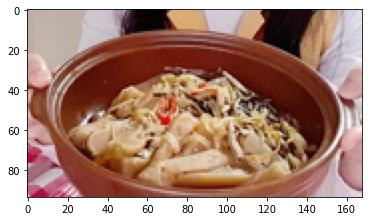

In [12]:
plt.imshow(X_img[0]/255)
# X_img.shape

# hpercent = (baseheight / float(img.size[1]))
# wsize = int((float(img.size[0]) * float(hpercent)))
# img = img.resize((wsize, baseheight), PIL.Image.ANTIALIAS)

### Transfer learning

In [13]:
# 그냥 validation_spilt 옵션 주자
# X_train = X_img
# y_train = y
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_img, y)
X_train.shape, X_valid.shape
y_train.shape

(10260,)

In [14]:
pre_trained_vgg = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(94, 168, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 94, 168, 3)]      0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 94, 168, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 94, 168, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 47, 84, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 47, 84, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 47, 84, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 23, 42, 128)       0     

### 단순예측

In [15]:
additional_model = keras.models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(keras.layers.Flatten()) # 5120
additional_model.add(keras.layers.Dense(2048, activation='relu'))
additional_model.add(keras.layers.Dense(512, activation='relu'))
additional_model.add(keras.layers.Dense(7, activation='softmax'))
 
additional_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 5, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense (Dense)                (None, 2048)              10487808  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 26,255,175
Trainable params: 11,540,487
Non-trainable params: 14,714,688
_________________________________________________________________


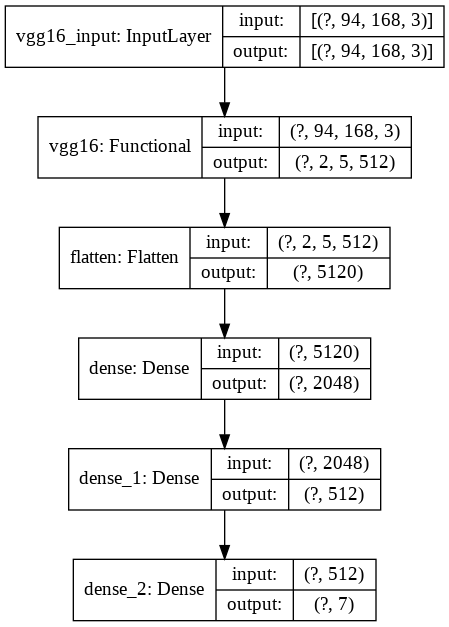

In [16]:
# additional_model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# history = additional_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

# # score = additional_model.evaluate(X_test, y_test)

# # X_new = X_test[:10] # pretend we have new images
# # y_pred = additional_model.predict(X_new)
keras.utils.plot_model(additional_model, show_shapes=True)

In [17]:
additional_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# epochs 6 이상은 RAM error가 발생함 ㅠ
history = additional_model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))

Epoch 1/3
321/321 [==============================] - 2081s 6s/step - loss: 2.1579 - accuracy: 0.7187 - val_loss: 0.5903 - val_accuracy: 0.7960
Epoch 2/3
321/321 [==============================] - 2097s 7s/step - loss: 0.3444 - accuracy: 0.8851 - val_loss: 0.6248 - val_accuracy: 0.8109
Epoch 3/3
321/321 [==============================] - 2099s 7s/step - loss: 0.1784 - accuracy: 0.9435 - val_loss: 0.7744 - val_accuracy: 0.8205


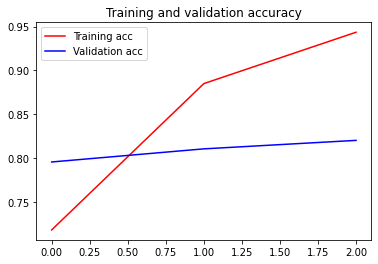

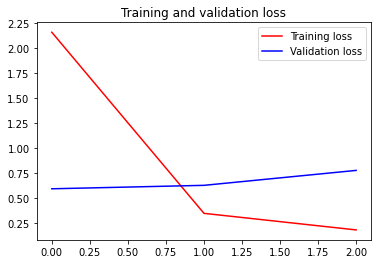

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 특성추출

In [19]:
extract_features_model = keras.models.Sequential()
extract_features_model.add(pre_trained_vgg)
extract_features_model.add(keras.layers.Flatten()) # 5120

In [20]:
extract_features_transfer_train = extract_features_model.predict(X_img)

In [21]:
extract_features_transfer_train.shape

(13681, 5120)

In [22]:
np.save("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/extract_features_transfer_train", extract_features_transfer_train) 
# extract_features_transfer_train.npy

### Test Image feature extraction

#### Test_data

In [23]:
df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/small_test_set.csv", encoding='utf-8-sig')
df2.shape

(3500, 11)

In [24]:
Xtest = df2['thumbnail']
y_test = df2['category_id']
y_test = np.array(y_test)
len(Xtest)

3500

In [25]:
X_test = []
for i in Xtest :
    url = i
    response = requests.get(url) 
    img = Image.open(io.BytesIO(response.content)) 
    size = (168,94)

    img = img.resize(size)
    # img = img.convert("RGB")
    img = image.img_to_array(img)
    
    X_test.append(img)
    
X_test = np.array(X_test)

In [26]:
X_test.shape, y_test.shape

((3500, 94, 168, 3), (3500,))

In [27]:
score = additional_model.evaluate(X_test, y_test)
score # loss & accuracy

110/110 [==============================] - 527s 5s/step - loss: 3.9275 - accuracy: 0.4357


[3.927457571029663, 0.4357142746448517]

In [28]:
pred_test = np.argmax(additional_model.predict(X_test), axis=-1)

In [29]:
true_test = np.array(df2["category_id"])

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [31]:
print(classification_report(true_test,pred_test))
# labels=["game", "movie", "pets","politics","sports","cooking","economy"]

              precision    recall  f1-score   support

           0       0.22      0.38      0.28       500
           1       0.58      0.52      0.55       500
           2       0.71      0.53      0.61       500
           3       0.47      0.42      0.44       500
           4       0.37      0.66      0.47       500
           5       0.70      0.52      0.60       500
           6       0.07      0.01      0.02       500

    accuracy                           0.44      3500
   macro avg       0.45      0.44      0.43      3500
weighted avg       0.45      0.44      0.43      3500



In [32]:
y_true = pd.Series(true_test)
y_pred = pd.Series(pred_test)

# labels=["game", "movie", "pets","politics","sports","cooking","economy"]
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6
True,,,,,,,
0,191,13,2,59,169,14,52
1,74,259,50,37,38,39,3
2,123,25,267,12,47,16,10
3,63,35,3,210,165,6,18
4,48,40,20,50,330,8,4
5,111,8,16,21,78,261,5
6,251,65,16,58,73,30,7


In [33]:
extract_features_transfer_test = extract_features_model.predict(X_test)

In [34]:
np.save("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/extract_features_transfer_test", extract_features_transfer_test) # extract_features_transfer_train.npy

In [35]:
type(y_pred)

pandas.core.series.Series

In [36]:
y_pred.to_csv("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/pred_vgg.csv",header=False)

In [37]:
y_pred

0       5
1       5
2       5
3       5
4       5
       ..
3495    4
3496    4
3497    4
3498    4
3499    4
Length: 3500, dtype: int64

## CNN Feature

### 기본 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os
from glob import glob
import io
import numpy as np
from io import BytesIO

### Train image features extraction

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/small_train_set.csv', encoding='utf-8-sig')
df.head()
df.shape

(13681, 11)

In [3]:
category = df['category_id']
thumbnail = df['thumbnail']

- 이미지 변환

In [4]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [5]:
image_w = 64
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    img = preprocess_input(img)
    X.append(img)

In [6]:
X = np.array(X)
Y = np.array(category)
Y = pd.get_dummies(Y).to_numpy()
X.shape

(13681, 64, 64, 3)

In [7]:
# 이미지 데이터 저장
np.save("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/small_train_X_imgs",X)

- 모델 구성

In [8]:
# 카테고리 지정하기
categories = category.unique()
nb_classes = len(categories)
# 이미지 크기 지정하기
image_w = 64
image_h = 64

# 데이터 정규화하기(0~1사이로)
X = X.astype("float") / 64 # 256 으로 하면?
print('X shape:', X.shape) # 74%

X shape: (13681, 64, 64, 3)


In [9]:
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3))) #전체 train에 돌릴때는 32로
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
last_layer = model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        1

- flatten_layer 추출

In [11]:
from keras.models import Model
layer_name = 'flatten'
flatten_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
flatten_output = flatten_layer_model.predict(X)

In [12]:
flatten_output.shape

(13681, 7200)

In [13]:
seq_image_features = pd.DataFrame(flatten_output)
np.save("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/seq_image_features",seq_image_features)

## Image_Classification with CNN

### 기본 필요 라이브러리

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os
from glob import glob
import io
import numpy as np
from io import BytesIO

### 1. 데이터 불러오기 


In [15]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/small_train_set.csv', encoding='utf-8-sig')
df.head()
df.shape

(13681, 11)

In [16]:
category = df['category_id']
thumbnail = df['thumbnail']

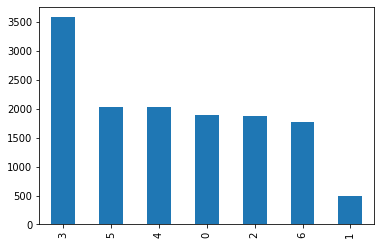

In [17]:
category.value_counts().plot.bar()

In [18]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

- 밑에 저장한 파일 있으니, 돌리지말고 쓰기
- image_train_test_split.npy

In [19]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail[0:1] :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
#     img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

#     # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
#     img = preprocess_input(img)
    X.append(img)

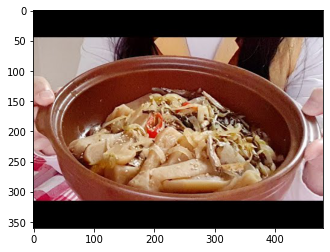

In [20]:
for i in range(len(X)):
    plt.figure()
    plt.imshow(X[i]/256)
    plt.show()
    X[i].shape

In [21]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    img = preprocess_input(img)
    X.append(img)

In [22]:
X = np.array(X)
Y = np.array(category)
Y = pd.get_dummies(Y).to_numpy()

In [23]:
X.shape
Y.shape

(13681, 7)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)
np.save("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/image_train_test_split.npy", xy)
print("ok,", len(Y))

ok, 13681


### 데이터 다시 열고 확인

In [26]:
# !pip install numpy==1.16.1
import numpy as np

In [27]:
# 데이터 열기 

# 혹시 ValueError: Object arrays cannot be loaded when allow_pickle=False => !pip install numpy==1.16.1
X_train, X_valid, y_train, y_valid = np.load("/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/image_train_test_split.npy", allow_pickle=True)

In [28]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((10260, 64, 64, 3), (3421, 64, 64, 3), (10260, 7), (3421, 7))

- 이미지 확인해보기

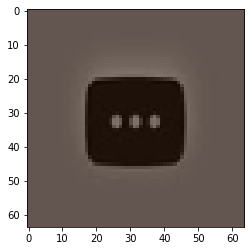

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


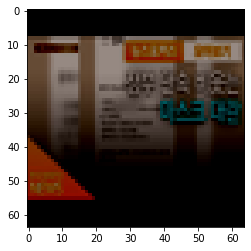

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


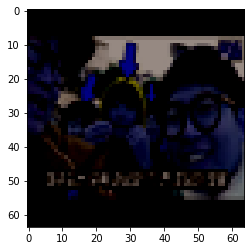

In [29]:
for i in range(3):
    plt.figure()
    plt.imshow(X_train[i]/256)
    plt.show()

### CNN_Sequential

In [30]:
# 카테고리 지정하기
categories = category.unique()
nb_classes = len(categories)
# 이미지 크기 지정하기
image_w = 64
image_h = 64

# 데이터 정규화하기(0~1사이로)
X_train = X_train.astype("float") / 64 # 256 으로 하면?
X_valid  = X_valid.astype("float")  / 64
print('X_train shape:', X_train.shape) # 74%
print('X_valid shape:', X_valid.shape)


X_train shape: (10260, 64, 64, 3)
X_valid shape: (3421, 64, 64, 3)


In [31]:
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os

In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3))) #전체 train에 돌릴때는 32로
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
last_layer = model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 64)       

Epoch 1/20
321/321 [==============================] - 150s 467ms/step - loss: 1.3188 - accuracy: 0.5620 - val_loss: 1.0497 - val_accuracy: 0.6361
Epoch 2/20
321/321 [==============================] - 148s 460ms/step - loss: 0.8415 - accuracy: 0.7095 - val_loss: 0.8155 - val_accuracy: 0.7150
Epoch 3/20
321/321 [==============================] - 148s 460ms/step - loss: 0.6799 - accuracy: 0.7706 - val_loss: 0.6938 - val_accuracy: 0.7565
Epoch 4/20
321/321 [==============================] - 148s 461ms/step - loss: 0.5558 - accuracy: 0.8104 - val_loss: 0.7281 - val_accuracy: 0.7533
Epoch 5/20
321/321 [==============================] - 149s 464ms/step - loss: 0.4689 - accuracy: 0.8485 - val_loss: 0.7006 - val_accuracy: 0.7857
Epoch 6/20
321/321 [==============================] - 153s 478ms/step - loss: 0.3730 - accuracy: 0.8789 - val_loss: 0.7146 - val_accuracy: 0.7752
Epoch 7/20
321/321 [==============================] - 151s 471ms/step - loss: 0.3325 - accuracy: 0.8926 - val_loss: 0.7399 -

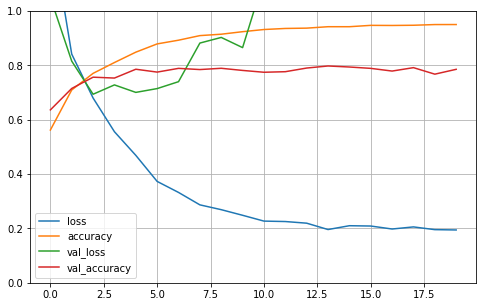

In [36]:
history1 = model.fit(X_train, y_train, batch_size=32, validation_data=(X_valid, y_valid),epochs=20)

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
# 모델 평가하기 
score = model.evaluate(X_valid, y_valid)
print('loss=', score[0])        # loss
print('accuracy=', score[1])    # acc

107/107 [==============================] - 11s 104ms/step - loss: 1.4222 - accuracy: 0.7854
loss= 1.4221501350402832
accuracy= 0.7854428291320801


- 모델 불러오기

In [38]:
from keras.models import model_from_json   
json_file = open("seq_model_81.json", "r")   
loaded_model_json = json_file.read()   
json_file.close()   
loaded_model = model_from_json(loaded_model_json)  

FileNotFoundError: ignored

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(7, 7, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = np.random.randint(0,len(X_valid))
    pred_image = np.array([X_valid[rnd_number]])
    pred_class = categories[y_valid[rnd_number]]#get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = loaded_model.predict(pred_image).reshape(7)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6],pred_prob)
            fig.add_subplot(ax)
fig.show()


- test
- 게임같은건 진짜 게임으로 분류하는데

In [ ]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3

i = "https://i.ytimg.com/vi/zqXKj8A5Nsw/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ==&amp;rs=AOn4CLBVKGeAvOXF3LIxv-gHm7JXCty6BA"
url = i+str('.jpg')
response = requests.get(url, stream=True) 
test_img= Image.open(io.BytesIO(response.content)) 
    
test_img = test_img.convert("RGB")
test_img = test_img.resize((image_w, image_h))
test_img = image.img_to_array(test_img)

 # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
test_img = preprocess_input(test_img)
test_img = test_img.astype("float") / 256
test_img = test_img.reshape(-1, 64, 64,3)

In [ ]:
# 예측
pred = model.predict(test_img)  
result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
print('data category : ',categories[result[0]])
# category ( 0: cooking , 1: economy, 2: game, 3: movie, 4: pets, 5: sports)

In [ ]:
<img id="img" class="style-scope yt-img-shadow" alt="" width="246" src="https://i.ytimg.com/vi/BmDT1eq23l4/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ==&amp;rs=AOn4CLAuNtF1J_P6ZCCQRFTEt2rTcTdv0g">

In [ ]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3

i = "https://i.ytimg.com/vi/BmDT1eq23l4/hqdefault.jpg?sqp=-oaymwEZCNACELwBSFXyq4qpAwsIARUAAIhCGAFwAQ==&amp;rs=AOn4CLAuNtF1J_P6ZCCQRFTEt2rTcTdv0g"
url = i+str('.jpg')
response = requests.get(url, stream=True) 
test_img= Image.open(io.BytesIO(response.content)) 

test_img.save('game.jpg')
    
test_img = test_img.convert("RGB")
test_img = test_img.resize((image_w, image_h))
test_img = image.img_to_array(test_img)

 # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
test_img = preprocess_input(test_img)
test_img = test_img.astype("float") / 256
test_img = test_img.reshape(-1, 64, 64,3)

np.save('games_array',test_img)
# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np



- 학습 완료된 모델 저장

In [ ]:
# 학습 완료된 모델 저장
seq_model_81_json = model.to_json()
with open("seq_model_81.json", "w") as json_file : 
    json_file.write(seq_model_81_json)
model.save_weights("seq_model_81.h5")
print("Saved model to disk")

# 5.Combination_Model

## 기본옵션

In [39]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import numpy as np
np.set_printoptions(threshold=np.inf)

In [40]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/데이터/small_train_set.csv', encoding='utf-8-sig')
y = df['category_id']
y = np.array(y)
y.shape

(13681,)

In [41]:
feature_self_cnn = np.load('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/seq_image_features.npy')
feature_self_cnn.shape

(13681, 7200)

In [42]:
features_vgg_train = np.load('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/4.Image_Feature/extract_features_transfer_train.npy')
features_vgg_train.shape

(13681, 5120)

In [82]:
feature_fxt = np.load('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/3.Text_Feature/okt_fxt.npy')
feature_w2v = np.load('/content/drive/My Drive/Colab Notebooks/Github정리/딥러닝프로젝트_유튜브/3.Text_Feature/okt_w2v.npy')
feature_fxt.shape, feature_w2v.shape

((13681, 200), (13681, 200))

## data split

In [83]:
# numpy 배열을 옆으로 붙입니다
case1_data = np.c_[features_vgg_train,feature_w2v]

# text 데이터 중 nan인 것이 있어 not np.isnan 을 통해 nan mask를 통해 데이터에 T/F 표시를 합니다.
nanmask = ~np.isnan(case1_data).any(axis=1)
# True인 데이터를 받습니다.
case1_nan = case1_data[nanmask]
y_nan = y[nanmask]

In [92]:
# 샘플의 개수 중 0.8개를 임의로 고릅니다.
train_idx = np.random.choice(case1_nan.shape[0], round(case1_nan.shape[0]*0.8), replace=False)
# 전체 데이터에서 train data index를 빼어 test data를 만듭니다.
test_idx = np.setdiff1d(range(case1_nan.shape[0]), train_idx)

train_idx.shape, test_idx.shape

((10909,), (2727,))

In [94]:
def cbind_(imgdata,textdata) :
  global train_idx
  global test_idx
  data = np.c_[imgdata,textdata]
  nanmask = ~np.isnan(data).any(axis=1)
  x_data = data[nanmask]
  y_data = y[nanmask]
  
  x_train = x_data[train_idx,:]
  y_train = y_data[train_idx]
  x_test = x_data[test_idx,:]
  y_test = y_data[test_idx]
  return x_train, y_train, x_test, y_test

In [95]:
x_case1_model, y_case1_model, x_case_1_test, y_case1_test = cbind_(features_vgg_train,feature_w2v)
x_case2_model, y_case2_model, x_case_2_test, y_case2_test = cbind_(features_vgg_train,feature_fxt)
x_case3_model, y_case3_model, x_case_3_test, y_case3_test = cbind_(feature_self_cnn,feature_fxt)
x_case4_model, y_case4_model, x_case_4_test, y_case4_test = cbind_(feature_self_cnn,feature_w2v)

## Train

### 1. w2v + vgg

In [96]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[5320]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1024, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="softmax")
])

model1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [97]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(x_case1_model, y_case1_model)
X_train.shape, X_valid.shape
history = model1.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

# history = model1.fit(case1_nan, y_nan, epochs=30, validation_split=0.3)

Epoch 1/50
256/256 [==============================] - 34s 131ms/step - loss: 8.7675 - accuracy: 0.7707 - val_loss: 3.3781 - val_accuracy: 0.8120
Epoch 2/50
256/256 [==============================] - 33s 130ms/step - loss: 2.5457 - accuracy: 0.8107 - val_loss: 2.1863 - val_accuracy: 0.8277
Epoch 3/50
256/256 [==============================] - 35s 138ms/step - loss: 2.0051 - accuracy: 0.8091 - val_loss: 1.7736 - val_accuracy: 0.8237
Epoch 4/50
256/256 [==============================] - 36s 141ms/step - loss: 1.8921 - accuracy: 0.8049 - val_loss: 1.8506 - val_accuracy: 0.7995
Epoch 5/50
256/256 [==============================] - 33s 130ms/step - loss: 1.8428 - accuracy: 0.8066 - val_loss: 1.6938 - val_accuracy: 0.8339
Epoch 6/50
256/256 [==============================] - 34s 133ms/step - loss: 1.8336 - accuracy: 0.8077 - val_loss: 1.6883 - val_accuracy: 0.8240
Epoch 7/50
256/256 [==============================] - 33s 129ms/step - loss: 1.8047 - accuracy: 0.8072 - val_loss: 1.7998 - val_ac

In [98]:
X_train.shape, X_valid.shape

((8181, 5320), (2728, 5320))

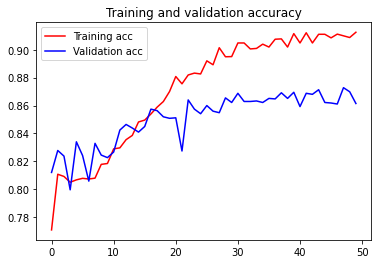

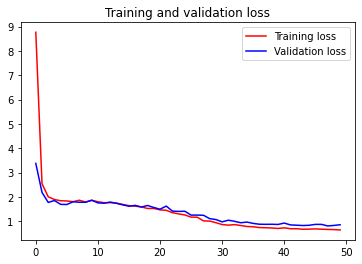

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2. fxt + vgg

In [100]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[5320]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1024, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

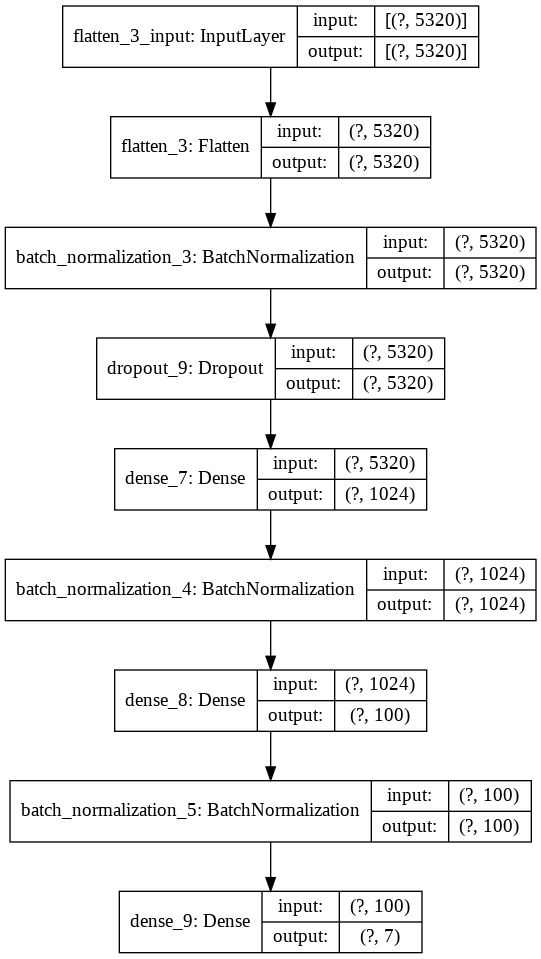

In [101]:
keras.utils.plot_model(model2, show_shapes=True)

In [102]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(x_case2_model, y_case2_model)
X_train.shape, X_valid.shape
history2 = model2.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
256/256 [==============================] - 34s 134ms/step - loss: 8.5680 - accuracy: 0.7960 - val_loss: 3.3044 - val_accuracy: 0.8383
Epoch 2/50
256/256 [==============================] - 34s 132ms/step - loss: 2.4837 - accuracy: 0.8257 - val_loss: 2.1176 - val_accuracy: 0.8526
Epoch 3/50
256/256 [==============================] - 34s 131ms/step - loss: 1.9146 - accuracy: 0.8264 - val_loss: 1.7488 - val_accuracy: 0.8570
Epoch 4/50
256/256 [==============================] - 33s 129ms/step - loss: 1.7793 - accuracy: 0.8306 - val_loss: 1.6918 - val_accuracy: 0.8438
Epoch 5/50
256/256 [==============================] - 33s 130ms/step - loss: 1.7455 - accuracy: 0.8309 - val_loss: 1.6661 - val_accuracy: 0.8618
Epoch 6/50
256/256 [==============================] - 33s 129ms/step - loss: 1.7817 - accuracy: 0.8264 - val_loss: 1.8157 - val_accuracy: 0.8446
Epoch 7/50
256/256 [==============================] - 34s 132ms/step - loss: 1.7240 - accuracy: 0.8382 - val_loss: 1.6151 - val_ac

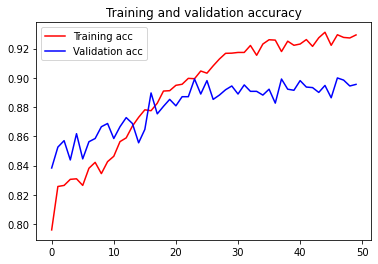

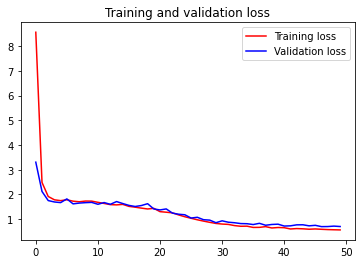

In [103]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 3. fxt + cnn

In [104]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[7400]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1024, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="softmax")
])

model3.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

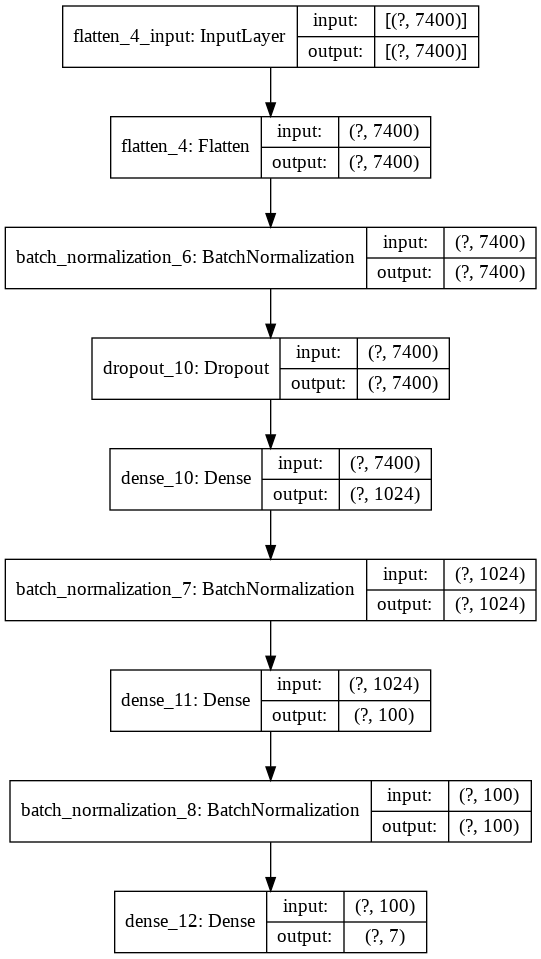

In [105]:
keras.utils.plot_model(model3, show_shapes=True)

In [106]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(x_case3_model, y_case3_model)
X_train.shape, X_valid.shape

((8181, 7400), (2728, 7400))

In [107]:
history3 = model3.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
256/256 [==============================] - 47s 183ms/step - loss: 7.3801 - accuracy: 0.6910 - val_loss: 2.4327 - val_accuracy: 0.7713
Epoch 2/50
256/256 [==============================] - 47s 182ms/step - loss: 2.0785 - accuracy: 0.7278 - val_loss: 2.0635 - val_accuracy: 0.6727
Epoch 3/50
256/256 [==============================] - 46s 181ms/step - loss: 1.8126 - accuracy: 0.7269 - val_loss: 1.8350 - val_accuracy: 0.7111
Epoch 4/50
256/256 [==============================] - 46s 181ms/step - loss: 1.7328 - accuracy: 0.7371 - val_loss: 1.7066 - val_accuracy: 0.7588
Epoch 5/50
256/256 [==============================] - 48s 187ms/step - loss: 1.6985 - accuracy: 0.7371 - val_loss: 1.6892 - val_accuracy: 0.7680
Epoch 6/50
256/256 [==============================] - 48s 186ms/step - loss: 1.6385 - accuracy: 0.7464 - val_loss: 1.8443 - val_accuracy: 0.6697
Epoch 7/50
256/256 [==============================] - 46s 180ms/step - loss: 1.6100 - accuracy: 0.7515 - val_loss: 1.4420 - val_ac

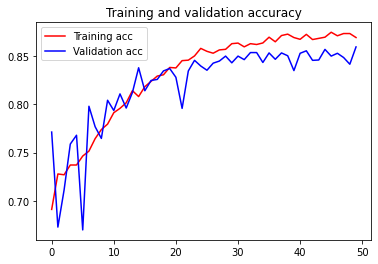

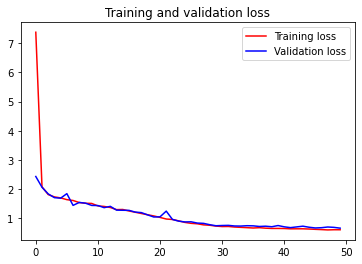

In [108]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 4. w2v + cnn

In [109]:
model4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[7400]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.4),
    keras.layers.Dense(1024, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu",
                         kernel_regularizer = keras.regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="softmax")
])

model4.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [110]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_valid, y_train, y_valid = train_test_split(x_case4_model, y_case4_model)
X_train.shape, X_valid.shape
history4 = model4.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
256/256 [==============================] - 45s 177ms/step - loss: 7.8022 - accuracy: 0.6678 - val_loss: 2.6552 - val_accuracy: 0.6430
Epoch 2/50
256/256 [==============================] - 45s 177ms/step - loss: 2.1687 - accuracy: 0.7037 - val_loss: 1.9474 - val_accuracy: 0.7108
Epoch 3/50
256/256 [==============================] - 46s 179ms/step - loss: 1.8983 - accuracy: 0.6973 - val_loss: 1.7929 - val_accuracy: 0.6899
Epoch 4/50
256/256 [==============================] - 48s 187ms/step - loss: 1.7841 - accuracy: 0.6977 - val_loss: 1.7179 - val_accuracy: 0.7207
Epoch 5/50
256/256 [==============================] - 46s 179ms/step - loss: 1.7355 - accuracy: 0.7059 - val_loss: 1.6952 - val_accuracy: 0.7082
Epoch 6/50
256/256 [==============================] - 45s 177ms/step - loss: 1.6974 - accuracy: 0.7112 - val_loss: 1.7384 - val_accuracy: 0.7075
Epoch 7/50
256/256 [==============================] - 46s 179ms/step - loss: 1.7008 - accuracy: 0.7116 - val_loss: 1.6345 - val_ac

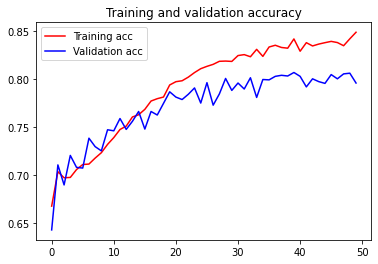

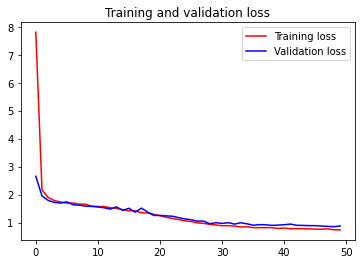

In [111]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Test** 

In [114]:
score1 = model1.evaluate(x_case_1_test, y_case1_test)
score2 = model2.evaluate(x_case_2_test, y_case2_test)
score3 = model3.evaluate(x_case_3_test, y_case3_test)
score4 = model4.evaluate(x_case_4_test, y_case4_test)

86/86 [==============================] - 2s 24ms/step - loss: 0.8925 - accuracy: 0.7976


In [116]:
pred_ = np.argmax(model2.predict(x_case_2_test), axis=-1)

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix( y_case2_test,pred_,)

# labels=["game", "movie", "pets","politics","sports","cooking","economy"]

array([[317,   9,   1,  13,  25,   3,   1],
       [ 11,  60,  17,   9,  12,   5,   0],
       [  4,   6, 308,   4,   9,   6,   0],
       [  6,   3,   3, 668,  21,   3,   0],
       [ 31,   6,   9,  19, 362,   8,   3],
       [ 10,   4,   2,   2,   7, 360,   0],
       [  2,   1,   0,   9,   4,   0, 364]])

In [118]:
y_true = pd.Series(y_case2_test)
y_pred = pd.Series(pred_)

pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6
True,,,,,,,
0,317,9,1,13,25,3,1
1,11,60,17,9,12,5,0
2,4,6,308,4,9,6,0
3,6,3,3,668,21,3,0
4,31,6,9,19,362,8,3
5,10,4,2,2,7,360,0
6,2,1,0,9,4,0,364


# 6.Explainable Model

## 기본 필요 라이브러리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os
from glob import glob
import io
import numpy as np
from io import BytesIO

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max.colwidth',100)
pd.options.display.max_columns = 100

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. 데이터 불러오기 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/youtube_project/small_total_train_set.csv", encoding='utf-8-sig')
df.shape

(13685, 12)

In [ ]:
category = df['category_id']
thumbnail = df['thumbnail']

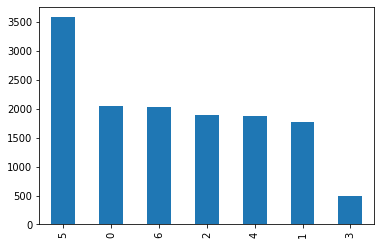

In [ ]:
category.value_counts().plot.bar()

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


- 밑에 저장한 파일 있으니, 돌리지말고 쓰기
- image_train_test_split.npy

In [ ]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail[2540:2541] :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
    img2 = img.convert("RGB")
#     img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

#     # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
#     img = preprocess_input(img)
    X.append(img)

<Figure size 432x288 with 0 Axes>

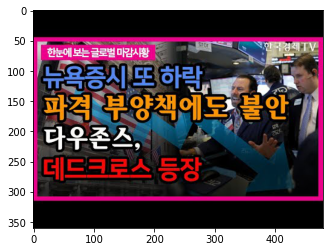

(360, 480, 3)

In [ ]:
for i in range(len(X)):
    plt.figure()
    plt.imshow(X[i]/256)
    plt.show()
    X[i].shape

In [ ]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    img = preprocess_input(img)
    X.append(img)

In [ ]:
X_train[1]

array([[[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       ...,

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1

In [ ]:
X = np.array(X)
Y = np.array(category)
Y = pd.get_dummies(Y).to_numpy()

In [ ]:
X.shape
Y.shape

(13685, 64, 64, 3)

(13685, 7)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)
np.save("image_train_test_split.npy", xy)
print("ok,", len(Y))

ok, 13685


## 데이터 다시 열고 확인

In [ ]:
# !pip install numpy==1.16.1
import numpy as np

In [ ]:
# 데이터 열기 

# 혹시 ValueError: Object arrays cannot be loaded when allow_pickle=False => !pip install numpy==1.16.1
X_train, X_valid, y_train, y_valid = np.load("image_train_test_split.npy", allow_pickle=True)

In [ ]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((10263, 64, 64, 3), (3422, 64, 64, 3), (10263, 7), (3422, 7))

- 이미지 확인해보기

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


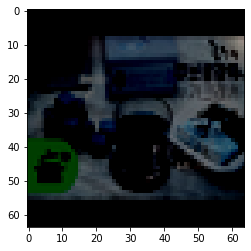

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


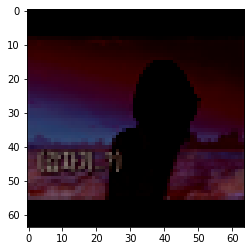

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


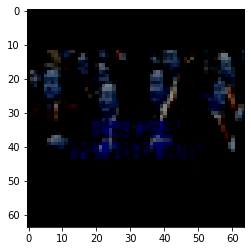

In [ ]:
for i in range(3):
    plt.figure()
    plt.imshow(X_train[i]/256)
    plt.show()

## CNN_Sequential

In [ ]:
# 카테고리 지정하기
categories = category.unique()
nb_classes = len(categories)
# 이미지 크기 지정하기
image_w = 64
image_h = 64

# 데이터 정규화하기(0~1사이로)
X_train = X_train.astype("float") / 64 # 256 으로 하면?
X_valid  = X_valid.astype("float")  / 64
print('X_train shape:', X_train.shape) # 74%
print('X_valid shape:', X_valid.shape)


X_train shape: (10263, 64, 64, 3)
X_valid shape: (3422, 64, 64, 3)


In [ ]:
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3))) #전체 train에 돌릴때는 32로
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
last_layer = model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 10263 samples, validate on 3422 samples
Epoch 1/20
10263/10263 [==============================] - 10s 978us/step - loss: 1.4086 - accuracy: 0.5286 - val_loss: 0.8602 - val_accuracy: 0.6897
Epoch 2/20
10263/10263 [==============================] - 4s 360us/step - loss: 0.8359 - accuracy: 0.7098 - val_loss: 0.7296 - val_accuracy: 0.7481
Epoch 3/20
10263/10263 [==============================] - 4s 359us/step - loss: 0.6577 - accuracy: 0.7708 - val_loss: 0.6675 - val_accuracy: 0.7703
Epoch 4/20
10263/10263 [==============================] - 4s 360us/step - loss: 0.5452 - accuracy: 0.8111 - val_loss: 0.6405 - val_accuracy: 0.7829
Epoch 5/20
10263/10263 [==============================] - 4s 357us/step - loss: 0.4557 - accuracy: 0.8435 - val_loss: 0.6977 - val_accuracy: 0.7618
Epoch 6/20
10263/10263 [==============================] - 4s 362us/step - loss: 0.3729 - accuracy: 0.8762 - val_loss: 0.6896 - val_accuracy: 0.7884
Epoch 7/20
10263/10263 [==============================] - 4s 3

(0.0, 1.0)

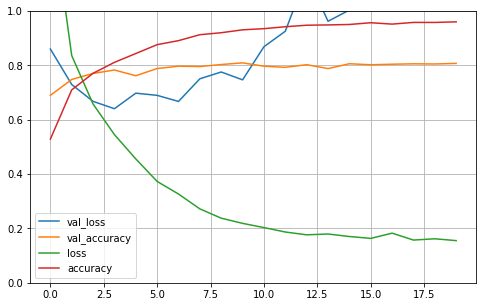

In [ ]:
history1 = model.fit(X_train, y_train, batch_size=32, nb_epoch=20 , validation_data=(X_valid, y_valid))


- 모델 불러오기

In [ ]:
from keras.models import model_from_json   
json_file = open("seq_model_81.json", "r")   
loaded_model_json = json_file.read()   
json_file.close()   
loaded_model = model_from_json(loaded_model_json)  

## 해석해보기

from keras import backend as K

In [ ]:
plt.figure()
plt.imshow(X[i]/256)
    plt.show()
    X[i].shape

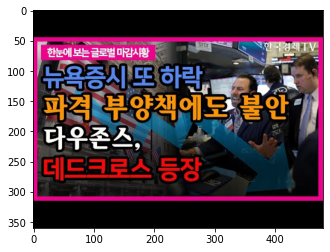

In [ ]:
x_ori = X[0]

x_ori = np.expand_dims(x_ori, axis=0)

plt.imshow(x_ori[0]/255)

In [ ]:
# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
img = img2.resize((image_w, image_h))
img = image.img_to_array(img)
img = preprocess_input(img)
x = np.expand_dims(img, axis=0)
x = x.astype("float")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


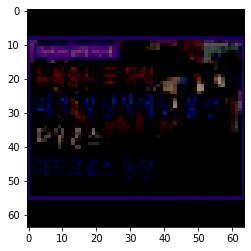

In [ ]:
plt.imshow(x[0]/255)

In [ ]:
# x = np.expand_dims(x, axis=0)
# img.astype("float")

In [ ]:
x[0]

array([[[-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        ...,
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031]],

       [[-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        ...,
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031]],

       [[-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        ...,
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299

In [ ]:
X_valid[0]

array([[[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       ...,

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1

In [ ]:
# x = x.astype("float")
x = x/255
preds = model.predict(x)
most_class = np.argmax(preds[0])
print(most_class)

0


In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
# 예측 벡터의 'tabby' 항목
african_crocodile_output = model.output[:, most_class] #(?,)

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer("conv2d_3") # (?, 14, 14, 512)

# block5_conv3의 특성 맵 출력에 대한 'tabby' 클래스의 그래디언트
grads = K.gradients(african_crocodile_output, last_conv_layer.output)[0] # 안에 값이 1인 list -> tensor

print(grads.shape) # (?, 14, 14, 512)

# 특성 맵 채널별 그래디언트 평균 값이 담긴 (512,) 크기의 벡터 -> 512개의 필터를 가지고 있다.
## 채널이 총 512 개 그 마지막 conv layer의 output 크기는 (14,14)
pooled_grads = K.mean(grads, axis=(0, 1, 2))

print(pooled_grads.shape) # (512,)

# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성 맵 출력을 구합니다
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
pooled_grads_value, conv_layer_output_value = iterate([x])  # x : 고양이 샘플 이미지

# "코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다 -> 512개의 필터 각각의 그레디언트 값에 곱해감 
## grads 가 클 수록 그 채널의 변화에 따른 output의 변화가 크다는 것을 의미 (그 채널에 더 큰 가중치를 줌)
for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
heatmap = np.mean(conv_layer_output_value, axis=-1)

(None, 30, 30, 64)
(64,)


In [ ]:
heatmap.shape

(30, 30)

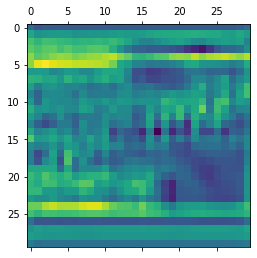

In [ ]:
# heatmap = np.maximum(heatmap, 0) # relu느낌으로 결과값을 보기 편하게
heatmap /= np.max(heatmap) # 표준화 느낌?
plt.matshow(heatmap, cmap='viridis')
plt.show()

In [ ]:
import cv2
# x[0]
heatmap = cv2.resize(heatmap, (480,360))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + x_ori[0]

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


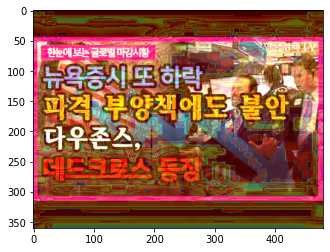

In [ ]:
# 이미지 경로
# cam_img_path = './sample_data/cam.jpg'

# 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
# superimposed_img = image.load_img(cam_img_path, target_size=(224, 224))

# (224, 224, 3) 크기의 넘파이 float32 배열
# superimposed_img1 = image.img_to_array(superimposed_img)

# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
# superimposed_img1 = np.expand_dims(superimposed_img1, axis=0)
plt.figure()
plt.imshow(superimposed_img/255)
plt.show()